## Modules

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data preprocessing

In [110]:
df1 = pd.read_csv('codeforces/X_train.csv')
df2 = pd.read_csv('codeforces/y_train.csv')
df = pd.merge(df1, df2, how='inner', on=['id'])
df

,id,contest1,contest2,contest3,contest4,contest5,contest6,contest7,contest8,contest9,contest10,rating
0,5316558161,2186,2283,2121,2030.0,1937.0,1943.0,1805.0,1776.0,1635.0,1541.0,2283
1,8188371053,2143,2254,2170,2185.0,2083.0,2105.0,2073.0,1982.0,2057.0,1966.0,2254
2,6014349269,2487,2315,2376,2348.0,2356.0,2275.0,2205.0,2183.0,2122.0,2188.0,2487
3,5969753904,2252,2221,2220,2290.0,2272.0,2265.0,2223.0,2329.0,2262.0,2269.0,2345
4,9129361700,2137,2091,2107,2147.0,2047.0,2035.0,2118.0,2105.0,2133.0,2109.0,2386
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1095857947,2129,1878,1930,1804.0,1768.0,1711.0,1665.0,1652.0,1614.0,1642.0,2129
1205,3981271911,2157,2044,1928,1999.0,2055.0,2072.0,2100.0,2003.0,2101.0,2042.0,2157
1206,9394313458,2365,2271,2236,2145.0,2099.0,2149.0,2256.0,2176.0,2067.0,2110.0,2365
1207,1803749910,2101,1976,1940,1901.0,1893.0,1967.0,1977.0,1944.0,1901.0,1742.0,2101


In [111]:
df.dropna(inplace=True)

<Axes: >

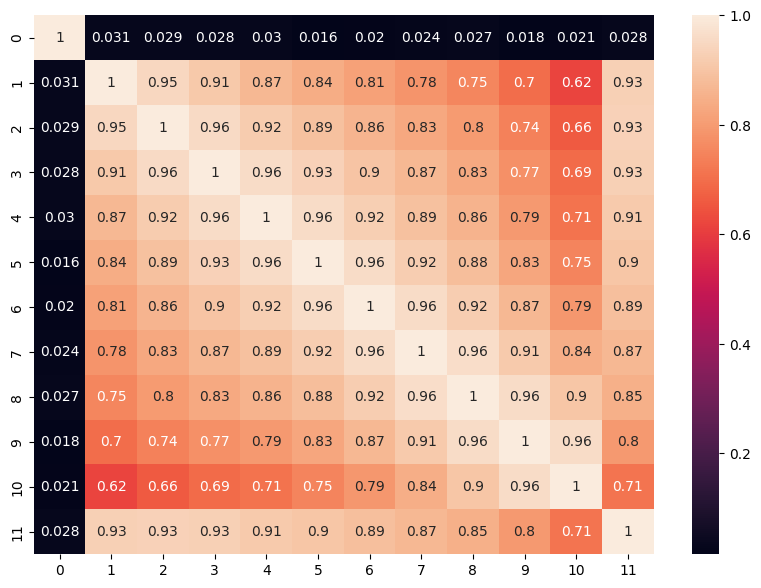

In [112]:
import seaborn as sn
cm = np.array(df.corr())
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)

In [113]:
df_sub = df.drop(['contest10', 'contest9'], axis=1)
df_sub

,id,contest1,contest2,contest3,contest4,contest5,contest6,contest7,contest8,rating
0,5316558161,2186,2283,2121,2030.0,1937.0,1943.0,1805.0,1776.0,2283
1,8188371053,2143,2254,2170,2185.0,2083.0,2105.0,2073.0,1982.0,2254
2,6014349269,2487,2315,2376,2348.0,2356.0,2275.0,2205.0,2183.0,2487
3,5969753904,2252,2221,2220,2290.0,2272.0,2265.0,2223.0,2329.0,2345
4,9129361700,2137,2091,2107,2147.0,2047.0,2035.0,2118.0,2105.0,2386
...,...,...,...,...,...,...,...,...,...,...
1204,1095857947,2129,1878,1930,1804.0,1768.0,1711.0,1665.0,1652.0,2129
1205,3981271911,2157,2044,1928,1999.0,2055.0,2072.0,2100.0,2003.0,2157
1206,9394313458,2365,2271,2236,2145.0,2099.0,2149.0,2256.0,2176.0,2365
1207,1803749910,2101,1976,1940,1901.0,1893.0,1967.0,1977.0,1944.0,2101


## Training and testing

In [114]:
X = df_sub.drop(columns='rating')
y = df_sub['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
print(reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
rmse

0.9241832583368914


68.49701005750694

In [116]:
RF = RandomForestRegressor(n_estimators=100, criterion='friedman_mse')
RF.fit(X_train, y_train)
y_predicted = RF.predict(X_test)
print(RF.score(X_test, y_test))

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
print(rmse)

0.95001324665801
55.61814777545034


## Submission

In [117]:
X_submission = pd.read_csv('codeforces/X_test.csv')
X_submission.drop(columns=['contest10', 'contest9'], inplace=True)
X_submission.fillna(X_test.mean(), inplace=True)
X_train = df_sub.drop(columns='rating')
y_train = df_sub['rating']

RF.fit(X_train, y_train)

y_predicted = RF.predict(X_submission)

result = np.column_stack((X_submission['id'].values, y_predicted))
result_df = pd.DataFrame(result, columns=['id', 'rating'])
result_df['id'] = result_df['id'].astype('Int64')
result_df.to_csv('submission.csv', index=False)